In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 507kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.76MB/s]


In [4]:
class mlp(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)
    return x

In [5]:
model = mlp()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
epochs = 8

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {e+1}, Loss: {running_loss/len(trainloader)}")


Epoch 1, Loss: 1.4489653551502268
Epoch 2, Loss: 0.4549457361893867
Epoch 3, Loss: 0.34458594920951674
Epoch 4, Loss: 0.299246929792453
Epoch 5, Loss: 0.265875093329118
Epoch 6, Loss: 0.23883339669754003
Epoch 7, Loss: 0.21323976842070946
Epoch 8, Loss: 0.1909705698688719


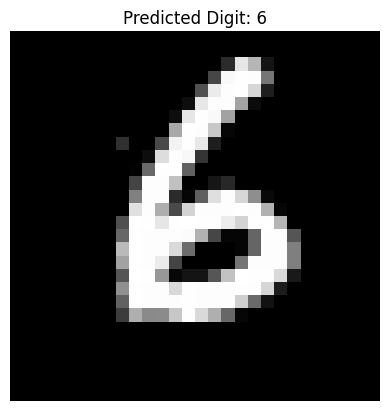

In [12]:
def predict_and_display(model, images):
    model.eval()
    with torch.no_grad():
        for i, image in enumerate(images):
            image_flat = image.view(1, 784)
            output = model(image_flat)
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1)

            plt.figure()
            plt.imshow(image.view(28,28), cmap="gray")
            plt.title(f"Predicted Digit: {top_class.item()}")
            plt.axis('off')
            plt.show()

images, labels = next(iter(trainloader))
predict_and_display(model, images[:1])